In [1]:
import pandas as pd
import numpy as np
import glob
import os

#read in the data
over15s = pd.concat([pd.read_csv(f, index_col='Unnamed: 0') for f in glob.glob('over15*.csv')])
onlydelayed = pd.concat([pd.read_csv(f, index_col='Unnamed: 0') for f in glob.glob('only-delayed*.csv')])
normal = pd.concat([pd.read_csv(f, index_col='Unnamed: 0') for f in glob.glob('Features*.csv')])

In [2]:
#check everything is ok
normal[normal['ARR_DELAY'] == 0].head()

,YEAR,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,DEST,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ELAPSED_TIME,DISTANCE,ARR_DELAY
118,2012,7,6,AA,DFW,TX,1130,75.0,224.0,0.0
126,2012,7,7,AA,DFW,TX,1130,75.0,224.0,0.0
130,2012,7,4,AA,DFW,TX,1130,75.0,224.0,0.0
144,2012,7,2,AA,MIA,FL,1340,155.0,964.0,0.0
150,2012,7,3,AA,MIA,FL,1340,155.0,964.0,0.0


In [3]:
# change the delay type to boolean
c_d_b = list()
w_d_b = list()
n_d_b = list()
s_d_b = list()
l_d_b = list()

for row in over15s.iterrows():
    if int(row[1][9]) == 0:
        c_d_b.append(0)
    else:
        c_d_b.append(1)
        
    if int(row[1][10]) == 0:
        w_d_b.append(0)
    else:
        w_d_b.append(1)

    if int(row[1][11]) == 0:
        n_d_b.append(0)
    else:
        n_d_b.append(1)
        
    if int(row[1][12]) == 0:
        s_d_b.append(0)
    else:
        s_d_b.append(1)
        
    if int(row[1][13]) == 0:
        l_d_b.append(0)
    else:
        l_d_b.append(1)

over15s['CARRIER_DELAY_BOOL'] = c_d_b
over15s['WEATHER_DELAY_BOOL'] = w_d_b
over15s['NAS_DELAY_BOOL'] = n_d_b
over15s['SECURITY_DELAY_BOOL'] = s_d_b
over15s['LATE_AIRCRAFT_DELAY_BOOL'] = l_d_b

over15s = over15s[[x for x in over15s.columns if x != 'CARRIER_DELAY' and x!='WEATHER_DELAY' and x!='NAS_DELAY' and x!='SECURITY_DELAY' and x!='LATE_AIRCRAFT_DELAY']]

In [4]:
# looks good!
over15s.head()

,YEAR,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,DEST,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ELAPSED_TIME,DISTANCE,ARR_DELAY,CARRIER_DELAY_BOOL,WEATHER_DELAY_BOOL,NAS_DELAY_BOOL,SECURITY_DELAY_BOOL,LATE_AIRCRAFT_DELAY_BOOL
0,2007,8,6,9E,MSP,MN,1045,175.0,1034.0,290.0,0,0,1,0,1
1,2007,8,2,9E,MSP,MN,1045,175.0,1034.0,24.0,0,0,0,0,1
2,2007,8,3,9E,MSP,MN,1045,175.0,1034.0,33.0,0,0,1,0,0
3,2007,8,4,9E,MSP,MN,1045,175.0,1034.0,31.0,0,0,1,0,1
4,2007,8,7,9E,MSP,MN,1045,175.0,1034.0,59.0,1,0,1,0,0


In [5]:
# change the column ARR_DELAY_NEW to ARR_DELAY for consistency in the onlydelayed dataframe
new_col = [c for c in onlydelayed.columns if c != 'ARR_DELAY_NEW']
new_col.append('ARR_DELAY')
onlydelayed.columns = new_col
print(onlydelayed.columns)
over15s.head()

Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'DEST',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'ARR_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,DEST,DEST_STATE_ABR,CRS_DEP_TIME,CRS_ELAPSED_TIME,DISTANCE,ARR_DELAY,CARRIER_DELAY_BOOL,WEATHER_DELAY_BOOL,NAS_DELAY_BOOL,SECURITY_DELAY_BOOL,LATE_AIRCRAFT_DELAY_BOOL
0,2007,8,6,9E,MSP,MN,1045,175.0,1034.0,290.0,0,0,1,0,1
1,2007,8,2,9E,MSP,MN,1045,175.0,1034.0,24.0,0,0,0,0,1
2,2007,8,3,9E,MSP,MN,1045,175.0,1034.0,33.0,0,0,1,0,0
3,2007,8,4,9E,MSP,MN,1045,175.0,1034.0,31.0,0,0,1,0,1
4,2007,8,7,9E,MSP,MN,1045,175.0,1034.0,59.0,1,0,1,0,0


In [6]:
# split the datasets
from sklearn.model_selection import train_test_split

datasets = [over15s, onlydelayed, normal]

X_trains = list()
X_tests = list()
y_trains = list()
y_tests = list()

for dataset in datasets:
    X = dataset[[x for x in dataset.columns if x != 'ARR_DELAY' and x!='MONTH' and x!='DAY_OF_WEEK' and x!='YEAR']]
    y = dataset['ARR_DELAY']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_trains.append(X_train)
    X_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)

In [7]:
# hot encode the training and testing sets
import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

X_trains_encoded = list()
X_tests_encoded = list()

for x in X_trains:
    X_trains_encoded.append(ohe.fit_transform(x))
    
for x in X_tests:
    X_tests_encoded.append(ohe.fit_transform(x))

In [8]:
# Now let's get into it
from sklearn import linear_model
import statsmodels.api as sm

# let's print the summary of each regression using statsmodels (default is WITHOUT an intercept)
for i in range(len(datasets)):
    model = sm.OLS( y_trains[i], X_trains_encoded[i]).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     189.1
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:20:29   Log-Likelihood:            -1.5135e+06
No. Observations:              287058   AIC:                         3.027e+06
Df Residuals:                  286901   BIC:                         3.029e+06
Df Model:                         156                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
UNIQUE_CARRIER_XE       

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     73.23
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:20:39   Log-Likelihood:            -1.6480e+06
No. Observations:              324204   AIC:                         3.296e+06
Df Residuals:                  324062   BIC:                         3.298e+06
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
UNIQUE_CARRIER_CO   491.0767    262.78

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     80.66
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:20:52   Log-Likelihood:            -2.0584e+06
No. Observations:              422992   AIC:                         4.117e+06
Df Residuals:                  422858   BIC:                         4.118e+06
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
UNIQUE_CARRIER_UA  -172.9448    163.33

In [9]:
# Now WITH an intercept using scikit learn, but let's just look at the over15s dataframe 

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_trains_encoded[0], y_trains[0])
score = lm.score(X_trains_encoded[0], y_trains[0])
print(score)

0.09325388028085002


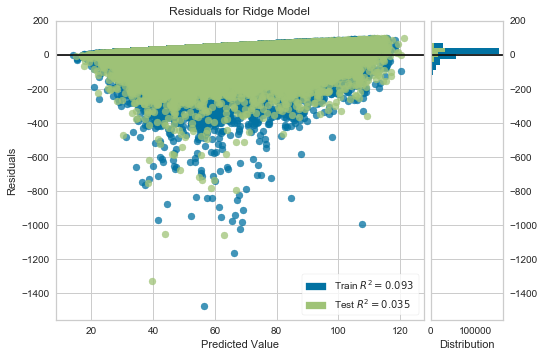

In [18]:
# residual plot
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_trains_encoded[0], y_trains[0])  # Fit the training data to the model
visualizer.score(X_tests_encoded[0], y_tests[0])  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [13]:
# so all of the unique carriers had almost identical coefficents, so lets re-analyze without them
n_c = list(X_trains_encoded[0].columns[17:])
x = X_trains_encoded[0][n_c]
# let's also add in some interaction variables based on the continuous columns
x['DEP_TIME_X_ELAPSED_TIME'] = x['CRS_DEP_TIME'] * x['CRS_ELAPSED_TIME']
x['DEP_TIME_X_DISTANCE'] = x['CRS_DEP_TIME'] * x['DISTANCE']
x['ELAPSED_TIME_X_DISTANCE'] = x['CRS_ELAPSED_TIME'] * x['DISTANCE']
y = y_trains[0]

/Users/nigelcox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/nigelcox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nigelcox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [14]:
# rework the model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     199.8
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:24:58   Log-Likelihood:            -1.5140e+06
No. Observations:              287058   AIC:                         3.028e+06
Df Residuals:                  286914   BIC:                         3.030e+06
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DEST_BNA                

In [15]:
# rework the model WITH an intercept
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
score = lm.score(x, y)
print(score)

0.09055190601841401


Text(0,0.5,'Predictions (min)')

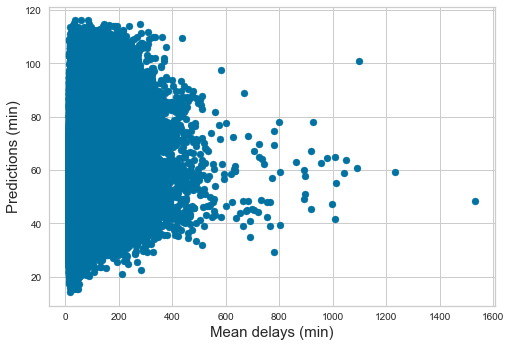

In [16]:
# Now let's look at the predictions vs actuals in a graph
# is this the same thing as a residual plot?
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec

predictions = lm.predict(x)
Y = y

plt.scatter(Y, predictions)
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)

# Summary

In the preliminary analysis, the R^2 values came out low, maxing out at .09. This value came from the dataset with delays greater than 15 minutes, giving us the additional information of what type of delay is happening in each instance. The other datasets, which included on that has all the instances of all delays, regardless of length and the other included all instances of every flight, regardless if it is delayed. 

Furthuring the analysis on the main dataset (the one with delays greater than 15 min) through looking at the result without an intercept yielded no gain in R^2 values. 

Now looking at the coefficients on the main dataset, it is noticed that the all of the carriers have almost identical coefficients, lending to the conclusion that there is no difference in the length of delays per each airline.
In terms of arrival airports, PNS (Pensacola Florida) tops the chart as having the greateest influence on helping flights arrive early, while ARS (Ancorage Alaska) has the greatest influence in helping flights arrive late. In terms of overall performance by State, Texas tops the charts as having the greatest influence on helpping flights arrive early, while Hawaii has the greatest influence on helping flights arrive later. These results make logical sense!

Departure time and elapsed time have very little influence, as their coefficients are quite small. Distance however has a reasonably sized coefficient because of it's potential to be a very high number. Ergo, the long the flight, the greater the delay will be compounded.

Lastly, the type of delay that greatest influences the flights favorably is in fact a security delay. The one that favors flights the least is a weather delay. This could be due to the fact that a security delay could resolve quite a bit quicker than a weather delay. 

Now, there could perhaps be interactions between the variables so further analysis should be done on the continuous variables. In the end, there is very little effect whatsoever on applying interactions to the continuous variables.


Lastly a residual plot is generated to determine if linear regression is appropriate. It appears to be fairly randomly dispersed around the horizontal, lending the idea that other types of regression probalby will not help the outcome of this analysis. 

In [19]:
#polynomial regression
n_c = list(X_trains_encoded[0].columns[17:])
x = X_trains_encoded[0][n_c]
# let's also add in some interaction variables based on the continuous columns
x['DEP_TIME_2'] = x['CRS_DEP_TIME'] * x['CRS_DEP_TIME']
x['DISTANCE_2'] = x['DISTANCE'] * x['DISTANCE']
x['ELAPSED_TIME_2'] = x['CRS_ELAPSED_TIME'] * x['CRS_ELAPSED_TIME']
y = y_trains[0]

/Users/nigelcox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/nigelcox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/nigelcox/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(x, y)
score = lm.score(x, y)
print(score)

0.09119320856548496


In [21]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:42:28   Log-Likelihood:            -1.5139e+06
No. Observations:              287058   AIC:                         3.028e+06
Df Residuals:                  286914   BIC:                         3.030e+06
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DEST_BNA                